In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]],dtype=np.float32)

In [9]:
x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

In [10]:
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.66],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

In [11]:
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.66 ],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

In [12]:
model = nn.Linear(input_size,output_size)

In [13]:
criterion = nn.MSELoss()

In [16]:
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [19]:
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,loss.item()))

Epoch [5/100], Loss: 0.2568
Epoch [10/100], Loss: 0.2565
Epoch [15/100], Loss: 0.2563
Epoch [20/100], Loss: 0.2561
Epoch [25/100], Loss: 0.2559
Epoch [30/100], Loss: 0.2557
Epoch [35/100], Loss: 0.2555
Epoch [40/100], Loss: 0.2553
Epoch [45/100], Loss: 0.2551
Epoch [50/100], Loss: 0.2549
Epoch [55/100], Loss: 0.2547
Epoch [60/100], Loss: 0.2545
Epoch [65/100], Loss: 0.2543
Epoch [70/100], Loss: 0.2541
Epoch [75/100], Loss: 0.2539
Epoch [80/100], Loss: 0.2537
Epoch [85/100], Loss: 0.2535
Epoch [90/100], Loss: 0.2533
Epoch [95/100], Loss: 0.2531
Epoch [100/100], Loss: 0.2529


In [21]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()

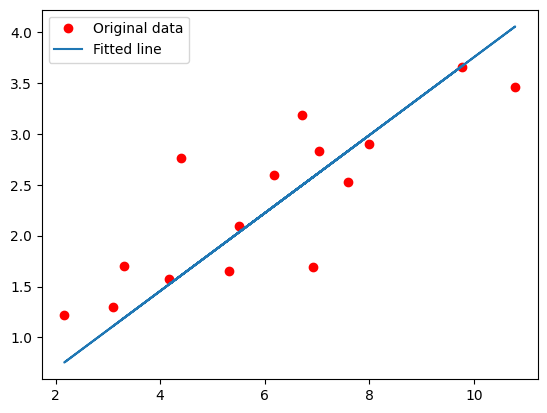

In [27]:
plt.plot(x_train,y_train,'ro',label='Original data')
plt.plot(x_train,predicted, label="Fitted line")
plt.legend()
plt.show()


In [29]:
torch.save(model.state_dict(),'model_liner.ckpt')